# Imports

In [91]:
# !pip install ucimlrepo
# !pip install matplotlib
# !pip install matplotlib

In [92]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import torch
import math
import time
import numpy as np
import matplotlib.pyplot as plt


# Data preperation

In [93]:
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = abalone.data.features 
y = abalone.data.targets 
  
# metadata 
print(abalone.metadata) 
  
# variable information 
print(abalone.variables) 


{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [94]:
missing_values = X.isnull().sum()
print(missing_values)


Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
dtype: int64


# Linear Algebra

In [95]:
# Show that the transpose of a mtrix is the matrx itself
A = torch.arange(6).reshape(2,3)
print(A)
print(A.T)
print(A.T.T)

tensor([[0, 1, 2],
        [3, 4, 5]])
tensor([[0, 3],
        [1, 4],
        [2, 5]])
tensor([[0, 1, 2],
        [3, 4, 5]])


In [96]:
# Given two matricies show that A^T + B^T = (A+B)^T
B = torch.arange(6).reshape(2,3)
print(B)
print(A.T + B.T)
print((A+B).T)

tensor([[0, 1, 2],
        [3, 4, 5]])
tensor([[ 0,  6],
        [ 2,  8],
        [ 4, 10]])
tensor([[ 0,  6],
        [ 2,  8],
        [ 4, 10]])


In [97]:
#Show that for a square matrix A, A^T * A is a symmetric matrix
A = torch.arange(9).reshape(3,3)
print(A.T@A)

tensor([[45, 54, 63],
        [54, 66, 78],
        [63, 78, 93]])


In [98]:
# For a 2x3x4 tensor A, what is len(A)?
# Len(A) is the length of the first axis, which has size 2
A = torch.arange(24).reshape(2,3,4)
print(len(A))
print(A[:,0,0])

2
tensor([ 0, 12])


In [99]:
# Normilize rows
B = torch.arange(6).reshape(2,3)
print(B)
print(B / B.sum(axis=1, keepdim=True))

tensor([[0, 1, 2],
        [3, 4, 5]])
tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])


In [100]:
# caluclate the distance between two points in downtown manhattan
def manhattan_distance(x, y):
    return torch.abs(x - y).sum()

x = torch.tensor([1, 0])
y = torch.tensor([3, 4])
print(manhattan_distance(x, y))

tensor(6)


In [101]:
# How does sum transform a matrix into a vector
A = torch.arange(24).reshape(2,3,4)
print(A.sum(axis=0).shape)
print(A.sum(axis=1).shape)
print(A.sum(axis=2).shape)

torch.Size([3, 4])
torch.Size([2, 4])
torch.Size([2, 3])


In [102]:
# Squatr each element of a matrix and then sum all the elements
A = torch.arange(24, dtype=float).reshape(2,3,4)
def normalize_rows(A):
    sum = 0
    for i in range(len(A)):
        for j in range(len(A[i])):
            for k in range(len(A[i][j])):
                sum = sum + A[i][j][k] ** 2
    return math.sqrt(sum)

print(normalize_rows(A))
print(torch.linalg.norm(A))

65.75712889109438
tensor(65.7571, dtype=torch.float64)


In [103]:
## Gausian matrix multiplication
#Initialize a matrix with a gaussian distribution with dimensions 1024x65536
A = torch.randn(1024, 65536)
B = torch.randn(65536, 32)
C = torch.randn(32, 16384)

start = time.time()
ans = A@(B@C)
end = time.time()
print(end - start)
print(ans.shape)

start = time.time()
ans = (A@B)@C
end = time.time()
print(end - start)
print(ans)


27.550013065338135
torch.Size([1024, 16384])
0.08230733871459961
tensor([[  544.8083, -2140.9087,   459.1837,  ...,  1740.1855,     7.3943,
         -1727.4803],
        [-2412.4463,  -197.6149,  1451.4589,  ...,   544.4436,   118.4410,
          -591.5270],
        [  205.1868, -2929.6404,  -243.7160,  ..., -1268.3663,  4620.5181,
         -2527.2146],
        ...,
        [  959.7993,    59.6315,  2682.2505,  ...,   914.2806,   735.5555,
          -100.9344],
        [-2902.1570,   182.2956,  1679.9674,  ...,  2098.8284,   202.7874,
         -1720.6808],
        [  906.9788,  2608.7686,  1340.4821,  ...,  -941.5670, -1382.3584,
          1288.9463]])


# Calculus

In [104]:
print(type(int(3.)))

<class 'int'>


In [111]:
point = 10

def f(x):
    return 3

def g(x, n):
    return x**n

def i(x):
    return math.exp(x)

def j(x):
    return x ** x

print('f')
for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(f(point+h)-f(point))/h:.5f}')

print('\ng')
for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(g(1+h, 2)-g(1, 2))/h:.5f}')

print('\ni')
for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(i(point+h)-i(point))/h:.5f}')

print('\nj')
for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(j(point+h)-j(point))/h:.5f}')

f
h=0.10000, numerical limit=0.00000
h=0.01000, numerical limit=0.00000
h=0.00100, numerical limit=0.00000
h=0.00010, numerical limit=0.00000
h=0.00001, numerical limit=0.00000

g
h=0.10000, numerical limit=2.10000
h=0.01000, numerical limit=2.01000
h=0.00100, numerical limit=2.00100
h=0.00010, numerical limit=2.00010
h=0.00001, numerical limit=2.00001

i
h=0.10000, numerical limit=23165.43630
h=0.01000, numerical limit=22136.96615
h=0.00100, numerical limit=22037.48270
h=0.00010, numerical limit=22027.56715
h=0.00001, numerical limit=22026.57593

j
h=0.10000, numerical limit=39202128245.65023
h=0.01000, numerical limit=33582424006.66561
h=0.00100, numerical limit=33080947994.18831
h=0.00010, numerical limit=33031355080.77621
h=0.00001, numerical limit=33026401288.22326


f
h=0.10000, numerical limit=4.21909
h=0.01000, numerical limit=4.02020
h=0.00100, numerical limit=4.00200
h=0.00010, numerical limit=4.00020
h=0.00001, numerical limit=4.00002
[-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
 -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
 -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
 -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
 -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
 -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
 -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.95959596 -0.85858586
 -0.75757576 -0.65656566 -0.55555556 -0.45454545 -0.35353535 -0.25252525
 -0.15151515 -0.05050505  0.05050505  0.15151515  0.25252525  0.35353535
  0.45454545  0.55555556  0.65656566  0.75757576  0.85858586  0.95959596
  1.06060606  1.16161616  1.26262626  1.36363636  1.46464646  1.56565657
  1.66666667  1.7676

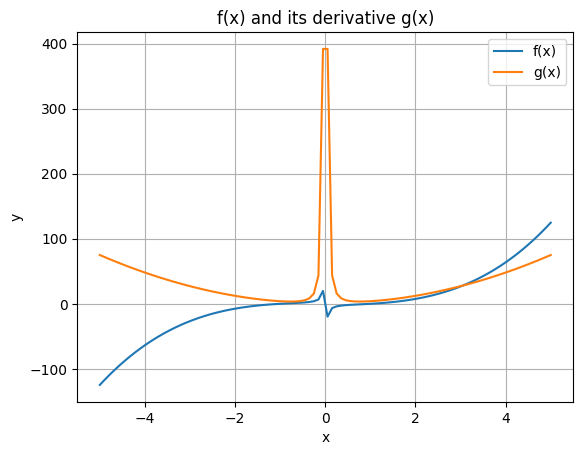

In [122]:
point = 1
def f(x):
    return (x ** 3) - (1 / x)

def g(x):
    return 3 * (x ** 2) + (1 / (x ** 2))

print('f')
for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(f(point+h)-f(point))/h:.5f}')

x = np.linspace(-5, 5, 100)
print(x)
plt.plot(x, f(x))
plt.plot(x, g(x))
plt.legend(['f(x)', 'g(x)'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('f(x) and its derivative g(x)')
plt.grid(True)
plt.show()
